# Project Windrush

Run this notebook to see the project.

In this project, we will be investigating government deporation data. In particular, we are interested in deporations which might be connected to the Windrush Scandal.
Uncovered in 2018 by journalists, the windrush scandal is the political scandal in which the Home Office was discovered to have detained, threatened and deported people, illegally, from the UK. It is known as the 'Windrush' scandal after the Empire Windrush, a ship which transported many people from the Carribean to the UK in the late 1940s. The generation of people who travelled to the UK from the late 1940s to early 1970s are therefore known as the Windrush Generation.

As more stories of unlawful treatment were uncovered by the guardian, the scandal gained public awareness and led to the resignation of the then home secretary Amber Rudd. The prime minister issued an apology about the treatment of Windrush citizens to Carribbean leaders and promised that the scandal would end. The current Home Secretary, Sajid Javid, also vowed to put an end to the scandal.

The initial question of the project was to answer the question: Has the Windrush Scandal really ended?

However, after deeper analysis of the data (see further down in the notebook), it became apparent that we were unable to answer this question with the data availble.

This notebook wil detail how we came to that conclusion.

### Timeline of Key Events

In [1]:
#Before we look at the data, we have created a timeline of events key to the Windrush Scandal. This is to give an overview of the scale of the scandal, as well as key dates which might explain data trends.

# Code adapted from https://matplotlib.org/gallery/lines_bars_and_markers/timeline.html

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

#make it look nice
plt.style.use('fivethirtyeight')

# A list of key Windrush dates, see references at the end

# Create series of  events
names = ['Empire Windrush arrived in the UK',
         'Immigration Act 1971', 'Cut off point for the 1971 Immigration Act', 
         'Registry slips destroyed','Theresa May first talks of the Hostile Environment policy',
         'One of the first Windrush stories reported in the Guardian', 
         'May apologies to Carribbean leaders', 'Amber Rudd resigns', 
         'Sajid Javid becomes Home Secretary']

# Create series of dates
dates = ['1948-06-22T03:00:07Z', 
         '1971-10-28T12:53:32Z', '1973-01-01T04:56:47Z',
         '2010-10-01T04:47:38Z', '2012-05-25T22:35:12Z',
         '2017-11-28T02:11:15Z', '2018-04-14T01:59:49Z',
         '2018-04-29T02:59:36Z', ]

#Select the correct datetime formart
dates = [datetime.strptime(ii, "%Y-%m-%dT%H:%M:%SZ") for ii in dates]

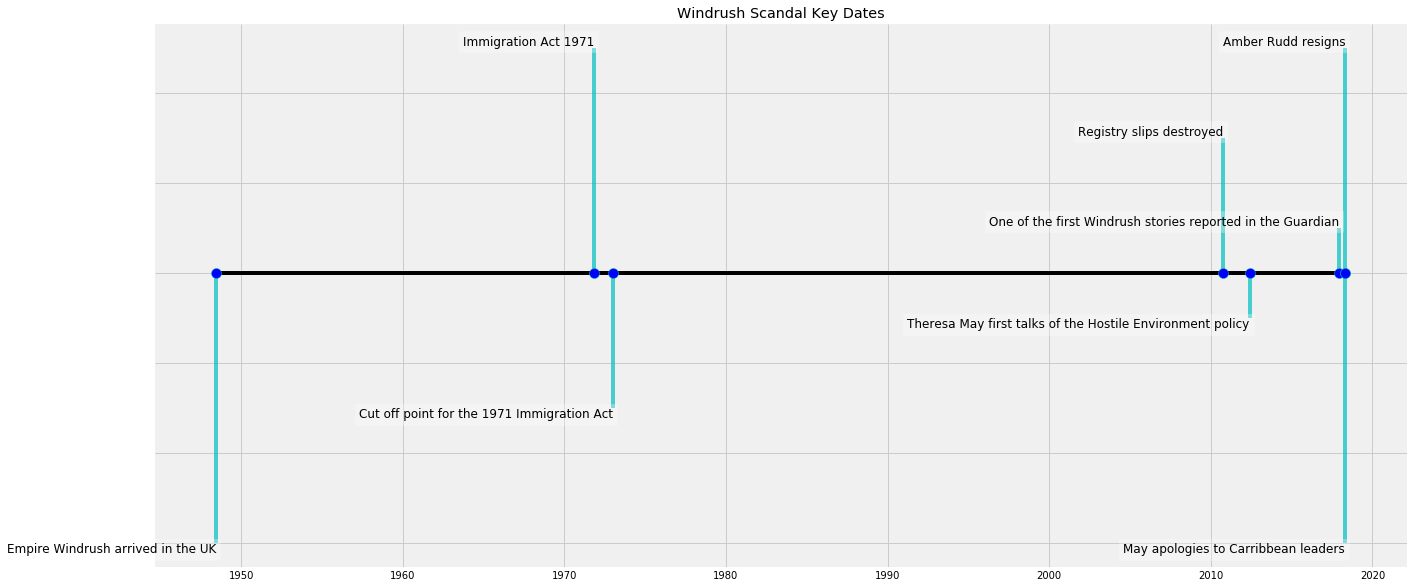

In [2]:
levels = np.array([-6, 5, -3, 3, -1, 1])
fig, ax = plt.subplots(figsize=(20, 10))

# Create the axis for the timeline
start = min(dates)
stop = max(dates)
ax.plot((start, stop), (0, 0), 'k', alpha=1)

# Annote on the axis where each point is
for ii, (iname, idate) in enumerate(zip(names, dates)):
    level = levels[ii %6]
    vert = 'top' if level < 0 else 'bottom'

    # Make it a nice colour
    ax.scatter(idate, 0, s=100, facecolor='b', edgecolor='c', zorder=9999)
    # Plot a line up to the text
    ax.plot((idate, idate), (0, level), c='c', alpha=.7)
    # Give the text a faint background and align it properly
    ax.text(idate, level, iname,
            horizontalalignment='right', verticalalignment=vert, fontsize=12,
            backgroundcolor=(1., 1., 1., .3))
ax.set(title="Windrush Scandal Key Dates",)

# Remove  box around the edge and the and y axis so it looks a bit nicer
plt.setp((ax.get_yticklabels() + ax.get_yticklines() +
          list(ax.spines.values())), visible=False)
plt.show()

Figure 1 -  Timeline of Windrush Scandal Key Dates

The above figure shows a timeline of key events. But what do they mean? Some of them are obvious, such as 'Empire Windrush arrived in the UK'. Other key dates are explained below.

October 1971     The Immigration Act of 1971 - This gave the right to Indefinate Leave to Remain (IRL)in the UK to citizens of Commonwealth Countries who arrived in the UK prior to the act. 
                 (https://www.legislation.gov.uk/ukpga/1971/77)

January 1973     Cut off point for the 1971 Immigration Act  - The 1971 Immigration Act came into aciton on the 1st of January 1973.

October 2010     Registry Slips are destroyed - This is when the Home Office commenced the destruction of Landing Slips, formerly known as Registry slips. For some people, Landing Slips are the only piece of evidence of their date of arrival in the UK.
                 (https://www.channel4.com/news/factcheck/factcheck-who-destroyed-the-windrush-landing-cards)

May 2012         Theresa May first mentions the 'Hostile Environment' Policy. As a part of this, people are now required to show proof of immigration status when                        accessing public services such as healthcare, benefits etc. Landing Slips, which provide evidence of the date of when people arrived in the UK, and                    therefore whether they are entitled to IRL under the 1971 Immigration Act, now become important pieces of information.
                (https://www.telegraph.co.uk/news/uknews/immigration/9291483/Theresa-May-interview-Were-going-to-give-illegal-migrants-a-really-hostile-reception.html)


#### What does this mean?

Essentially what this timeline shows is that the Windrush generation are commonwealth citizens who arrived in the UK before 1973. To specifically analyse whether the scandal has ended would require data on nationality, and data on entry time to the UK.

### Sourcing Data


There are two different sources of data which we could use. The first is from the UK government website:
https://data.gov.uk/dataset/043bc9c5-5375-4bd4-9c46-bb91d24a2a5d/immigration-enforcement-data .
Similar data can also be found on the European Data Portal. However, after looking through the data, it appeared that more up to date data are published on the European Data Portal than on the UK Gov website - there is more recent data on the European Portal.
https://www.europeandataportal.eu/data/en/dataset/immigration-enforcement


The next step is to select the data that is needed. 
There are many different classifications of deportations, and this is represesnted in multiple spreadsheets on the European Data Portal. In order to help understand the terms used in the spreadsheets, we used the Home Office Glossary of terms for interpretation of immigration statistics, which can be found at this link: https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/781065/user-guide-immigration-statistics.pdf

We have selected some of the key terms from this document and made a glossary.

### Glossary of Key Terms

In [3]:
# Create a dataframe for the glossary
Glossary = pd.DataFrame({"Term":['Deportations', 'Enforced removal', 'Voluntary returns'],
                          "Meaning":['A specific subset of returns which are enforced either following a criminal conviction or when it                              is judged that a person’s  removal from the UK is conducive to the public good. The deportation order prohibits the person returning to the UK until such  time as it may be revoked','A person has  breached UK immigration laws and / or has no valid leave to remain in the UK. They have declined to leave voluntarily and the Home Office enforces their return from the UK. It includes enforced removals from detention and non- detained enforced removals.', 'Comprises of assisted returns,     notified or controlled returns, and other verified returns. It is important to note that this term                                         describes the method of departure, not a particular choice to leave ']})

# Show the full table, not just the truncated table
pd.set_option('display.max_colwidth',1)
Glossary

,Term,Meaning
0,Deportations,A specific subset of returns which are enforced either following a criminal conviction or when it is judged that a person’s removal from the UK is conducive to the public good. The deportation order prohibits the person returning to the UK until such time as it may be revoked
1,Enforced removal,A person has breached UK immigration laws and / or has no valid leave to remain in the UK. They have declined to leave voluntarily and the Home Office enforces their return from the UK. It includes enforced removals from detention and non- detained enforced removals.
2,Voluntary returns,"Comprises of assisted returns, notified or controlled returns, and other verified returns. It is important to note that this term describes the method of departure, not a particular choice to leave"


Table 1 - Glossary of terms

As can be seen in the glossary, voluntary returns are still a type of deportation as they do not indicate a particular chocie to leave. As such, this category will be included in any data analysis, as is common practice (see for example analysis done by the Oxford Migration Observatory https://migrationobservatory.ox.ac.uk/resources/briefings/deportations-removals-and-voluntary-departures-from-the-uk/)

### Checking data
The Home Office supplies deportation data in many different formats, and as can be seen by the terms in the glossary, confusing terms.
In order to ensure that the right data is being analysed, one table is taken to see if there are comparable values in published literature.

In [4]:
#In order to show an overview of trends in deporation numbers, the first table shows total number of enforced and voluntary removals from 2011-2018.

In [5]:
# Read the data
df = pd.read_excel('returns5-sep-2018-tables.xls', sheet_name='rt_07_q', header=3)

# Check it is there
df.head()

,Year,Quarter,Total,A (highest harm),B (high harm),C (medium harm),D (low harm),Cases not assessed
0,2011,2011 Q1,Total enforced removals,982,987,1804,z,191
1,2011,2011 Q1,Total voluntary removals,126,668,5306,z,881
2,2011,2011 Q2,Total enforced removals,762,1005,1540,z,149
3,2011,2011 Q2,Total voluntary removals,93,650,3734,z,679
4,2011,2011 Q3,Total enforced removals,806,950,1729,z,179


In [6]:
#In the table above, Column 'D (low harm)' contains integers and the letter 'z'. This will become a problem if we want to sum up totals, as it will not include the column in any calculations. As such, as need to replace any 'z' with a '0'.

df_removals = df.replace('z', 0)

#Check the first few rows
df_removals.head()

,Year,Quarter,Total,A (highest harm),B (high harm),C (medium harm),D (low harm),Cases not assessed
0,2011,2011 Q1,Total enforced removals,982,987,1804,0,191
1,2011,2011 Q1,Total voluntary removals,126,668,5306,0,881
2,2011,2011 Q2,Total enforced removals,762,1005,1540,0,149
3,2011,2011 Q2,Total voluntary removals,93,650,3734,0,679
4,2011,2011 Q3,Total enforced removals,806,950,1729,0,179


In [7]:
# First we want to find the totals for each Quarter, as we are interested in all the numbers. So that it does not add the year into the sum, create a separate list removing the year column.
col_list= list(df_removals)
col_list.remove('Year')

df_removals['Quarterly Sum'] = df[col_list].sum(axis=1)

#check
df_removals

,Year,Quarter,Total,A (highest harm),B (high harm),C (medium harm),D (low harm),Cases not assessed,Quarterly Sum
0,2011,2011 Q1,Total enforced removals,982,987,1804,0,191,3964
1,2011,2011 Q1,Total voluntary removals,126,668,5306,0,881,6981
2,2011,2011 Q2,Total enforced removals,762,1005,1540,0,149,3456
3,2011,2011 Q2,Total voluntary removals,93,650,3734,0,679,5156
4,2011,2011 Q3,Total enforced removals,806,950,1729,0,179,3664
5,2011,2011 Q3,Total voluntary removals,100,576,4091,0,1816,6583
6,2011,2011 Q4,Total enforced removals,809,1133,1749,0,288,3979
7,2011,2011 Q4,Total voluntary removals,105,637,4345,0,2612,7699
8,2012,2012 Q1,Total enforced removals,867,1041,1471,42,335,3714
9,2012,2012 Q1,Total voluntary removals,87,583,3740,363,2953,7363


Table 2, Deportations by type 2011-2018

In [8]:
# To check that we have the right data (that the right categories of deportations are being compared) we will take the sum of all enforced and voluntary removals for one year and compare it against a verified source.

# First locate just 2011.
df_removals_graph_2011 = df_removals[df_removals['Year'] == 2011]
df_removals_graph_2011

#Then sum 
df_removals_graph_2011['Quarterly Sum'].sum()

41482

This means that in the year 2011, a total of 41,482 deportations were recorded.

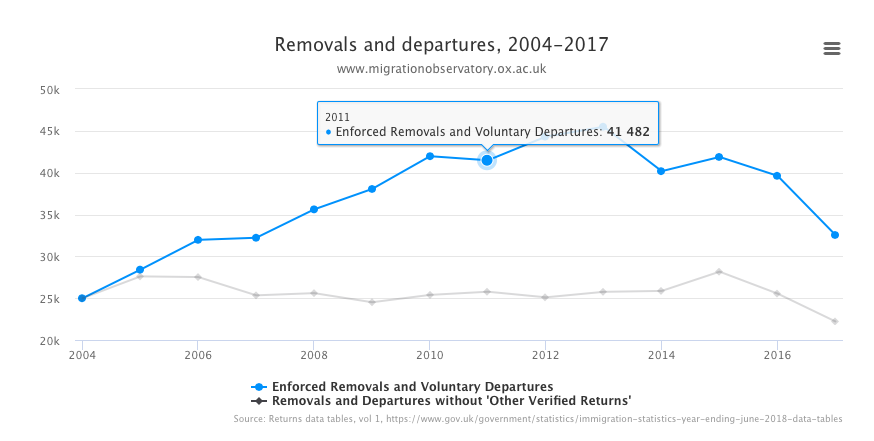

In [9]:
# Display the image from Oxford Migration Observatory 
from IPython.display import Image
Image("2011_ox_mo.png")

We can see that the figures we have correspond with other data analysis, from the Oxford Migration Observatory (a total of 41482 enforced and voluntary departures) That means we are using the correct data. This is important, because later on we analyse the data by nationality and the numbers look a little different.

In [10]:
# We now have the quarterly sums. In order to see change over time more clearly, this can be plotted on a graph. First make a new dataframe with the data to be plotted.
df_removals_graph = df_removals[['Quarter','Quarterly Sum','Total']]

#Show the first few rows to check
df_removals_graph.head()

,Quarter,Quarterly Sum,Total
0,2011 Q1,3964,Total enforced removals
1,2011 Q1,6981,Total voluntary removals
2,2011 Q2,3456,Total enforced removals
3,2011 Q2,5156,Total voluntary removals
4,2011 Q3,3664,Total enforced removals


In [11]:
# This data cannot be easily plotted. This is because of the type of data. The code below shows that the colummn 'Quarter' is a string (object)
print(df_removals_graph.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
Quarter          62 non-null object
Quarterly Sum    62 non-null int64
Total            62 non-null object
dtypes: int64(1), object(2)
memory usage: 1.5+ KB
None


In [12]:
# In order to turn this into dateime format it would be ideal to  first replace Q1 = January etc and then convert the string into date.time format so that it can be plotted
# However, this has proven difficult (in a good way) so it has not happened

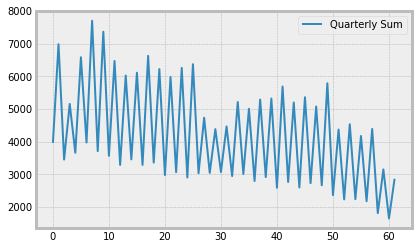

In [13]:
# Therefore a not ideal graph will be plotted using the data just to show a general trend in deportations.

# Make it blue
plt.style.use('bmh')
df_removals_graph.plot.line()


Figure 2 Deportations by Quarter (2011-2018)

Whilst the x axis is incorrectly labeled, the graph above shows that there has been a general downward trend in the number of people deported since 2011. The next step is to look at who - which nationalities that is - has been been deported.

### Who is being deported?



According to the timeline at the begining of the notebook, there are a few variables which could identify is individuals as victims of the windrush scandal.
Firstly, that they came to the UK before 1973. Unfortunatly, this data is not easily publicly available. The second factor is somebodies' nationality - are they from a commonwealth country? What this means is that we cannot answer our original question without more data, but we can look at trends in deportations by nation.Whilst the Windrush Scandal was heavily publicised as mainly affecting people of Carribean origin, there have been reports that the scope of people affected is much wider (eg https://www.independent.co.uk/news/uk/home-news/windrush-commonwealth-hostile-india-ghana-pakistan-a8404936.html)

For this reason, we will focus on deportations of people with nationality to commonwealth countries.

In order to answer this question we will be using a different data table.
This can be found at https://www.europeandataportal.eu/data/?#/datasets/immigration-statistics-removals, the dataset entitled 'Q3 2018 Vol 4'.

In [14]:
df_nationality = pd.read_excel('Q3 2018 Vol 4.xls', header=3)
df_nationality

,Year,Geographical region,Country of nationality,Asylum/non-asylum,Home/EU/ other,Total enforced returns,Enforced removals,Other returns from detention,Voluntary returns (excluding returns from detention),Total refused entry at port and subsequently departed,Unnamed: 10,Total enforced removals,Voluntary removals (including returns from detention)
0,2014 Q1,*Total,*Total,*Total,*Total,3716,3036,680,7639,3366,NaN,3036,8319
1,2014 Q1,Africa North,*Total Africa North,*Total,*Total,83,73,10,227,110,NaN,73,237
2,2014 Q1,Africa Sub-Saharan,*Total Africa Sub-Saharan,*Total,*Total,410,354,56,1007,443,NaN,354,1063
3,2014 Q1,America North,*Total America North,*Total,*Total,16,16,0,164,539,NaN,16,164
4,2014 Q1,America Central and South,*Total America Central and South,*Total,*Total,178,163,15,313,461,NaN,163,328
5,2014 Q1,Asia Central,*Total Asia Central,*Total,*Total,201,185,16,71,41,NaN,185,87
6,2014 Q1,Asia East,*Total Asia East,*Total,*Total,151,118,33,894,189,NaN,118,927
7,2014 Q1,Asia South,*Total Asia South,*Total,*Total,1341,882,459,3500,286,NaN,882,3959
8,2014 Q1,Asia South East,*Total Asia South East,*Total,*Total,199,183,16,488,121,NaN,183,504
9,2014 Q1,EU 14,*Total EU 14,*Total,*Total,91,91,0,6,78,NaN,91,6


Table 2, Deportations by Nationality

The above table shows deportations since 2014 by nationality. There are immediate discrepencies between this table and deportations by type table - e.g. Table 1 suggests there were 3376 voluntary removals in 2014 Q1 whereas this table suggests there were 8319.

It is unclear why this discrepancy exists. This makes further analysis confusing, as it is uncertain which numbers are best to use.

In [15]:
# We can calculate which region of nationalities are most deported.

# Create variable
region = df_nationality['Geographical region']

# Count the values
region_counts = region.value_counts ()
region_counts

Africa Sub-Saharan           11400
America Central and South    10032
Europe Other                 6612 
Oceania                      6384 
Other                        3648 
EU 14                        3420 
Middle East                  3420 
Asia South East              2736 
EU 8                         2052 
Africa North                 2052 
Asia East                    2052 
Asia South                   1824 
Asia Central                 1596 
America North                1140 
EU Other                     912  
EU 2                         684  
*Total                       228  
Name: Geographical region, dtype: int64

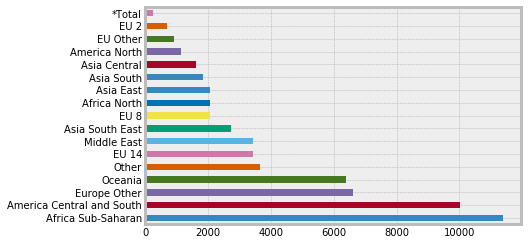

In [16]:
# Create a bar chart to show the data more clearly
region_counts.plot.barh ()

The graph above shows that most people deported over the past 4 years have been of Sub-Saharan African nationality, followed by Central America and South Amererican nationality. However, we are interested in individuals who might be affected by the Windrush Scandal.

Whilst the Windrush Scandal was heavily publicised as mainly affecting people of Carribean origin, there have been reports that the scope of people affected is much wider (eg https://www.independent.co.uk/news/uk/home-news/windrush-commonwealth-hostile-india-ghana-pakistan-a8404936.html)

A look at the timeline and of Immmigration legislature as well as news, suggest that the Windrush Scandal could have affected anybody who's status to indefinate leave to remain in Britain was affected by the 1971 Immigration Act.
Schedule 3 of the 1981 Immigration Act provides a legal definition of commonwealth nations, for whom the 1971 act would be applicable for. 
This list of countries will therefore be used to analyse the dataset.

In order to easily access this data, the countries (listed at https://www.legislation.gov.uk/ukpga/1981/61/schedule/3) have been saved onto a CSV file.


Whilst the Windrush Scandal was heavily publicised as mainly affecting people of Carribean origin, there have been reports that the scope of people affected is much wider (eg https://www.independent.co.uk/news/uk/home-news/windrush-commonwealth-hostile-india-ghana-pakistan-a8404936.html)

As can be seen above, there is no Carribean region, or commonwealth region. In order to analyse the data efficiently below is a new dataframe of Commonwealth nations.

Figure 3 Deportations by Geographical Region (2014-2018)

In [17]:
# Saving the countries that we will analyse
cw_countries = pd.read_csv('commonwealth countries.csv')
cw_countries

# This gives us an extra column that we don't need so we remove it 
cw_countries = cw_countries['Nationality']
cw_countries

0     Antigua and Barbuda             
1     Australia                       
2     The Bahamas                     
3     Bangladesh                      
4     Barbados                        
5     Belize                          
6     Botswana                        
7     Brunei                          
8     Cameroon                        
9     Canada                          
10    Republic of Cyprus              
11    Dominica                        
12    Fiji                            
13    The Gambia                      
14    Ghana                           
15    Grenada                         
16    Guyana                          
17    India                           
18    Jamaica                         
19    Kenya                           
20    Kiribati                        
21    Lesotho                         
22    Malawi                          
23    Malaysia                        
24    Malta                           
25    Mauritius          

In [18]:
# The next step would be to identify the countries that are present in both df_cw_countries and df_nationalities: selecting only the Commonwealth countries.

country = df_nationality['Country of nationality']
commonwealth_countries = np.where(country== 'cw_countries')
commonwealth_countries

#Unfortunatly this is not doing what I want it to

(array([], dtype=int64),)

In [19]:
Data_2018 = pd.read_excel('Q3 2018 Vol 4.xls', header=3)
Data_2018

,Year,Geographical region,Country of nationality,Asylum/non-asylum,Home/EU/ other,Total enforced returns,Enforced removals,Other returns from detention,Voluntary returns (excluding returns from detention),Total refused entry at port and subsequently departed,Unnamed: 10,Total enforced removals,Voluntary removals (including returns from detention)
0,2014 Q1,*Total,*Total,*Total,*Total,3716,3036,680,7639,3366,NaN,3036,8319
1,2014 Q1,Africa North,*Total Africa North,*Total,*Total,83,73,10,227,110,NaN,73,237
2,2014 Q1,Africa Sub-Saharan,*Total Africa Sub-Saharan,*Total,*Total,410,354,56,1007,443,NaN,354,1063
3,2014 Q1,America North,*Total America North,*Total,*Total,16,16,0,164,539,NaN,16,164
4,2014 Q1,America Central and South,*Total America Central and South,*Total,*Total,178,163,15,313,461,NaN,163,328
5,2014 Q1,Asia Central,*Total Asia Central,*Total,*Total,201,185,16,71,41,NaN,185,87
6,2014 Q1,Asia East,*Total Asia East,*Total,*Total,151,118,33,894,189,NaN,118,927
7,2014 Q1,Asia South,*Total Asia South,*Total,*Total,1341,882,459,3500,286,NaN,882,3959
8,2014 Q1,Asia South East,*Total Asia South East,*Total,*Total,199,183,16,488,121,NaN,183,504
9,2014 Q1,EU 14,*Total EU 14,*Total,*Total,91,91,0,6,78,NaN,91,6


In [20]:
#Another analysis can be done in relation to the continent with the highest number of nationalities of deported individuals

Data_2018 = pd.read_excel('Q3 2018 Vol 4.xls', header=3)
Data_2018

,Year,Geographical region,Country of nationality,Asylum/non-asylum,Home/EU/ other,Total enforced returns,Enforced removals,Other returns from detention,Voluntary returns (excluding returns from detention),Total refused entry at port and subsequently departed,Unnamed: 10,Total enforced removals,Voluntary removals (including returns from detention)
0,2014 Q1,*Total,*Total,*Total,*Total,3716,3036,680,7639,3366,NaN,3036,8319
1,2014 Q1,Africa North,*Total Africa North,*Total,*Total,83,73,10,227,110,NaN,73,237
2,2014 Q1,Africa Sub-Saharan,*Total Africa Sub-Saharan,*Total,*Total,410,354,56,1007,443,NaN,354,1063
3,2014 Q1,America North,*Total America North,*Total,*Total,16,16,0,164,539,NaN,16,164
4,2014 Q1,America Central and South,*Total America Central and South,*Total,*Total,178,163,15,313,461,NaN,163,328
5,2014 Q1,Asia Central,*Total Asia Central,*Total,*Total,201,185,16,71,41,NaN,185,87
6,2014 Q1,Asia East,*Total Asia East,*Total,*Total,151,118,33,894,189,NaN,118,927
7,2014 Q1,Asia South,*Total Asia South,*Total,*Total,1341,882,459,3500,286,NaN,882,3959
8,2014 Q1,Asia South East,*Total Asia South East,*Total,*Total,199,183,16,488,121,NaN,183,504
9,2014 Q1,EU 14,*Total EU 14,*Total,*Total,91,91,0,6,78,NaN,91,6


In [21]:
#Create a variable and count the values
region = Data_2018['Geographical region']
region_counts = region.value_counts ()
region_counts

Africa Sub-Saharan           11400
America Central and South    10032
Europe Other                 6612 
Oceania                      6384 
Other                        3648 
EU 14                        3420 
Middle East                  3420 
Asia South East              2736 
EU 8                         2052 
Africa North                 2052 
Asia East                    2052 
Asia South                   1824 
Asia Central                 1596 
America North                1140 
EU Other                     912  
EU 2                         684  
*Total                       228  
Name: Geographical region, dtype: int64

In [22]:
#Recode the values so they are categorised into continents
def recode_region(value):
    if pd.isna(value): 
        return np.nan
    if value.startswith('Africa'):
        return 'Africa'
    if value.startswith('America Central and South'):
        return 'South and Central America'
    if value.startswith('Europe Other'):
        return 'Europe'
    if value.startswith('Oceania'):
        return 'Australia'
    if value.startswith('EU'):
        return 'Europe'
    if value.startswith('Middle East'):
        return 'Asia'
    if value.startswith('Asia'):
        return 'Asia'
    if value.startswith('Other'):
        return 'n/a'
    if value.startswith('America North'):
        return 'North America'

In [23]:
#Display the recode to cross check if there are any mistakes and make changes accordingly
recoded_region = region.apply(recode_region)
recoded_region

0        None                     
1        Africa                   
2        Africa                   
3        North America            
4        South and Central America
5        Asia                     
6        Asia                     
7        Asia                     
8        Asia                     
9        Europe                   
10       Europe                   
11       Europe                   
12       Europe                   
13       Europe                   
14       Asia                     
15       Australia                
16       n/a                      
17       Asia                     
18       Europe                   
19       Africa                   
20       Australia                
21       Europe                   
22       Africa                   
23       n/a                      
24       South and Central America
25       South and Central America
26       Europe                   
27       South and Central America
28       Australia  

In [24]:
#Display the contents
continent_counts = recoded_region.value_counts()
continent_counts

Europe                       13680
Africa                       13452
Asia                         11628
South and Central America    10032
Australia                    6384 
n/a                          3648 
North America                1140 
Name: Geographical region, dtype: int64

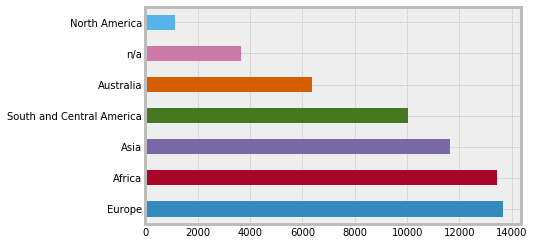

In [25]:
#Visual display using bar chart
continent_counts.plot.barh()

In [26]:
#From there, we could calculate totals for each country by year, and plot this on a graph. This would allow us to see if deportations to these countries have changed over time, and if so how. It would also be cool to perhaps predict the final quarter of data for 2018, using the mean as a predictor.

### Conclusion

In conclusion, to properly answer the original question, different / more data is needed. It is unlikely that this information will become publicly availble, seeing as it is quite possible that the government has not collected the data.

Immigration data provided by the UK government is complex and there are unexplained differences in numbers - for example, it is unclear why the sums of deportation by nationalities are different to the deportations by harm type. 
However, deportations overall have been steadily decreasing in the past seven year,  despite the introduciton of the Hostile Environment policy (or perhaps in spite of ).

Further analysis which could be interesting could include seeing if there is a correlation between general immigrtaion statistics, asylum applications, etc and deportations to see if this is why deportations have reduced.

### References

Legislation.gov.uk. (2019). British Nationality Act 1981. [online] Available at: https://www.legislation.gov.uk/ukpga/1981/61/schedule/3 [Accessed 6 Apr. 2019].

Migration Observatory. (2019). Deportations, Removals and Voluntary Departures from the UK - Migration Observatory. [online] Available at: https://migrationobservatory.ox.ac.uk/resources/briefings/deportations-removals-and-voluntary-departures-from-the-uk/ [Accessed 6 Apr. 2019].

Legislation.gov.uk. (n.d.). Immigration Act 1971. [online] Available at: https://www.legislation.gov.uk/ukpga/1971/77 [Accessed 6 Apr. 2019].

Khomami, N. (2019). How the Windrush scandal led to fall of Amber Rudd – timeline. [online] the Guardian. Available at: https://www.theguardian.com/uk-news/2018/apr/30/how-windrush-scandal-fall-amber-rudd-timeline [Accessed 6 Apr. 2019].

Kirkup, J. (2012). Theresa May interview: 'We're going to give illegal migrants a really hostile reception'. [online] Telegraph.co.uk. Available at: https://www.telegraph.co.uk/news/uknews/immigration/9291483/Theresa-May-interview-Were-going-to-give-illegal-migrants-a-really-hostile-reception.html [Accessed 6 Apr. 2019].

Lee, G. (2018). FactCheck: who destroyed the Windrush landing cards?. [online] Channel 4 News. Available at: https://www.channel4.com/news/factcheck/factcheck-who-destroyed-the-windrush-landing-cards [Accessed 6 Apr. 2019].


Bullman, M. (2018). Windrush scandal 'tip of iceberg' as other Commonwealth citizens targeted by hostile policies. [online] the Independant. Available at: https://www.independent.co.uk/news/uk/home-news/windrush-commonwealth-hostile-india-ghana-pakistan-a8404936.html [Accessed 6 Apr. 2019].